In [1]:
import pandas as pd

In [2]:
bc = pd.read_csv('../../datasets/OtherAssetsCSV/bitcoin.csv') #from 2015, many sources only have from 2014 to present day
sp_500 = pd.read_csv('../../datasets/OtherAssetsCSV/SP500(1).csv') #oct 2012 to 2021
au = pd.read_csv('../../datasets/OtherAssetsCSV/gold.csv')# from 2004 to present day
tb_1y = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds1.csv') # 1962 to present

In [3]:

#EJEMPLO por si alguien quiere quedarse sin

#sp_500['date'] = pd.to_datetime(sp_500['DATE'])
#sp_500['date'].dt.month
#sp_500['year'] = sp_500['date'].dt.year

#start_date = '2012-10-16'
#end_date = '2017-10-16'

#test = sp_500[(sp_500['date'] > start_date) & (sp_500['date'] <= end_date) == True]

In [4]:
#tb_1y['returns'] = tb_1y['returns'].fillna(0)
#tb_1y

In [5]:
tb_1y['returns'] = tb_1y['returns']/100

In [6]:
tb_1y.head(3)

,date,value,returns
0,02/01/1962,3.22,NaN
1,03/01/1962,3.24,0.000062
2,04/01/1962,3.24,0.000000


## cambiar fechas y unificar dfs

In [7]:
sp_500['date'] = pd.to_datetime(sp_500['DATE'])
sp_500 = sp_500.rename({'daily_return': 'sp_500'}, axis=1)[['date', 'sp_500']]

bc['date'] = pd.to_datetime(bc['time'])
bc = bc.rename({'daily_return': 'bc'}, axis=1)[['date', 'bc']]

au['date'] = pd.to_datetime(au['Date'])
au = au.rename({'daily_return': 'au'}, axis=1)[['date', 'au']]

tb_1y['date'] = pd.to_datetime(tb_1y['date'])
tb_1y = tb_1y.rename({'returns': 'tb_1y'}, axis=1)[['date', 'tb_1y']]


C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '15/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '16/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '17/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '18/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\U

C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '14/08/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '15/08/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '18/08/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '19/08/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\U

C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '31/03/1987' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '13/04/1987' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '14/04/1987' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '15/04/1987' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\U

C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '24/05/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '25/05/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '26/05/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '30/05/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\U

C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '25/11/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '26/11/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '27/11/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_10812\3826829267.py:10: UserWarning: Parsing '29/11/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\U

## Unir tablas

In [8]:
#result = pd.concat([sp_500, bc], axis=1, join="inner")
result = sp_500.merge(bc, how='inner', on='date')
result = result.merge(au, how='inner', on='date')
result = result.merge(tb_1y, how='inner', on='date')

result

,date,sp_500,bc,au,tb_1y
0,2015-07-20,0.000771,NaN,-0.027151,0.000690
1,2015-07-21,-0.004262,-0.009571,-0.003122,0.000968
2,2015-07-22,-0.002388,0.002055,-0.005410,0.000000
3,2015-07-23,-0.005676,-0.001799,-0.004485,-0.000294
4,2015-07-24,-0.010703,0.042287,0.009777,-0.000303
...,...,...,...,...,...
1384,2021-12-23,0.006224,0.045950,0.002254,0.001071
1385,2021-12-28,-0.001010,-0.062595,-0.004310,0.001818
1386,2021-12-29,0.001402,-0.022545,-0.000297,-0.000256
1387,2021-12-30,-0.002990,0.014005,0.007177,0.000000


In [9]:
#sp_500.groupby(by='year').count()

# Intento de hacer los plots de los assets

In [10]:
#test_var = (test.var()['daily_return']*243)**0.5
#test_mean = test.mean()['daily_return']*243*100

In [11]:
values = result[['sp_500', 'bc', 'au', 'tb_1y']]

ret_vars = (values.var()*243)**0.5

ret_means = values.mean()*243*100

returns_df = pd.DataFrame()

returns_df['returns'] = ret_means
returns_df['volatility'] = ret_vars

returns_df.shape[0]

4

In [12]:
values.head()

,sp_500,bc,au,tb_1y
0,0.000771,NaN,-0.027151,0.000690
1,-0.004262,-0.009571,-0.003122,0.000968
2,-0.002388,0.002055,-0.005410,0.000000
3,-0.005676,-0.001799,-0.004485,-0.000294
4,-0.010703,0.042287,0.009777,-0.000303


In [13]:
returns_df

,returns,volatility
sp_500,10.925192,0.183045
bc,70.705249,0.675140
au,5.898612,0.133841
tb_1y,0.350396,0.009786


In [14]:
ret_means

sp_500    10.925192
bc        70.705249
au         5.898612
tb_1y      0.350396
dtype: float64

In [15]:
df = returns_df.reset_index()

In [16]:
# CURVA CON LOS 4 ASSETS

import numpy as np

num_portfolios = 10000
num_assets = 4#returns.shape[0]

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

ind_er = ret_means
cov_matrix = values.cov()

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [17]:
data = {'Returns':p_ret, 'Volatility':p_vol}


for counter, symbol in enumerate(df['index'].unique()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created
#data['Returns']

,Returns,Volatility,sp_500 weight,bc weight,au weight,tb_1y weight
0,24.156882,0.215671,0.141830,0.296282,0.263470,0.298418
1,12.578126,0.113143,0.348834,0.094626,0.339114,0.217426
2,11.852809,0.104416,0.277441,0.096040,0.326528,0.299991
3,32.165951,0.302209,0.099936,0.434769,0.030757,0.434538
4,15.081265,0.133984,0.409521,0.121631,0.332166,0.136682


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

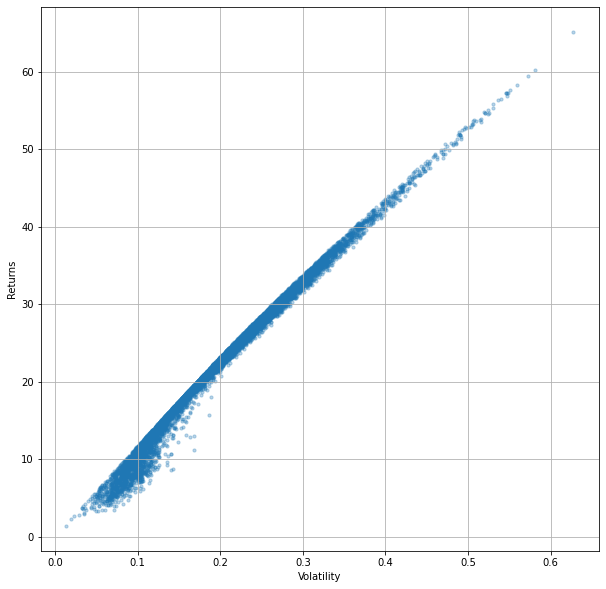

In [18]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

# Experimento usando S&P 500 y bonos de 1 año
- Bitcoin cambia mucho "la forma" de la curva. 

In [19]:
# CURVA CON bonos y s&p 500

import numpy as np

num_portfolios = 10000
num_assets = 2#returns.shape[0]

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights


ind_er = [10.925192,0.350396]
cov_matrix = values[['sp_500','tb_1y']].cov()

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [20]:
df_2 = df.head(1)
df_2 = pd.concat([df.head(1), df.tail(1)])
df_2

,index,returns,volatility
0,sp_500,10.925192,0.183045
3,tb_1y,0.350396,0.009786


In [21]:
data = {'Returns':p_ret, 'Volatility':p_vol}


for counter, symbol in enumerate(df_2['index'].unique()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created
#data['Returns']

,Returns,Volatility,sp_500 weight,tb_1y weight
0,7.200719,0.120915,0.647797,0.352203
1,4.683578,0.077289,0.409765,0.590235
2,4.315325,0.070930,0.374941,0.625059
3,7.391098,0.124221,0.665800,0.334200
4,2.074954,0.032729,0.163082,0.836918


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

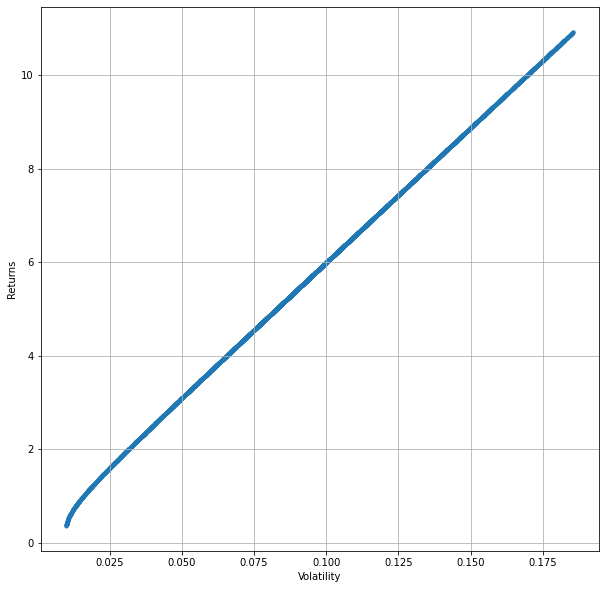

In [22]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])


# Sharpe Ratio

Las escalas parecen estar bien

In [23]:
returns_df
#short term bonds: 4.28

returns_df['sharpe'] = (returns_df['returns']/100 - 0.0428)/returns_df['volatility']

returns_df

,returns,volatility,sharpe
sp_500,10.925192,0.183045,0.363035
bc,70.705249,0.675140,0.983874
au,5.898612,0.133841,0.120936
tb_1y,0.350396,0.009786,-4.015489
